# **Linear Regression**

**Problem Statement**
<br>Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the potential.

**import libraries**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**read dataset**

In [156]:
inp0 = pd.read_csv("googleplaystore.csv")

In [157]:
inp0.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up


In [158]:
# check number of columns, rows and data types
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [159]:
# checking data types
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Finding and treating NULL values**

In [160]:
inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [161]:
# dropping the records with null ratings
# this is becasue rating is our target column
inp0.dropna(how='any', inplace=True)

In [162]:
inp0.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Handling variables**

In [163]:
# cleaning price column
inp0.Price.value_counts()[:5]

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

Observation: Some have dollar sign and some have zero value without dollar sign.

In [164]:
def convert_price(price):
  if price == '0':
    return 0
  else:
    return float(price[1:])

inp0['Price'] = inp0['Price'].map(convert_price)

In [165]:
# converting reviews to numeric
def convert_reviews(review):
    if 'M' in review:
        return int(float(review.replace('M', '')) * 1000000)
    elif 'K' in review:
        return int(float(review.replace('K', '')) * 1000)
    else:
        return int(review)

# Apply the function to the Reviews column
inp0['Reviews'] = inp0['Reviews'].apply(convert_reviews)

In [166]:
# Handling the installs column
inp0['Installs'].value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

observation: we have to remove + and , signs. Drop row with 'free'

In [167]:
# drop row with installs value as 'Free'
inp0 = inp0[inp0['Installs'] != 'Free']

# function to clean installs
def clean_installs(val):
  return int(val.replace("+","").replace(",",""))

# apply function to column
inp0['Installs'] = inp0['Installs'].map(clean_installs)

In [168]:
# Handling app size column
def change_size(size):
  if 'M' in size:
    x = size[:-1]
    x = float(x)*1000
    return(x)
  elif 'k' in size[-1:]:
    x = size[:-1]
    x = float(x)
    return(x)
  else:
    return None

inp0['Size'] = inp0['Size'].map(change_size)

In [169]:
# filling size which dad NA
inp0['Size'].fillna(method = 'ffill', inplace = True)

**Sanity checks**

**1. Rating should be between 1 to 5 in playstore. Delete any rows that have values outside this range.**

In [170]:
inp0['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

**2. Reviews should not be more than installs. Because only those who installed can review.**

In [171]:
inp0[inp0['Installs'] < inp0['Reviews']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [172]:
inp0 = inp0[inp0['Installs'] >= inp0['Reviews']]


**3. for free apps price should be zero**

In [173]:
inp0[(inp0['Price'] > 0) & (inp0['Type'] == 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver


## **EDA**

**Box plot**

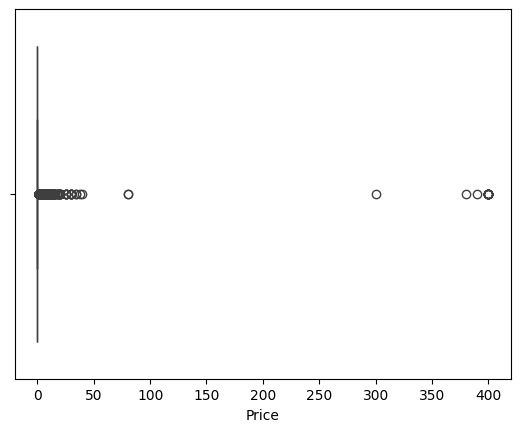

In [174]:
# Are there any outliers
sns.boxplot(x = inp0['Price'])
plt.show()

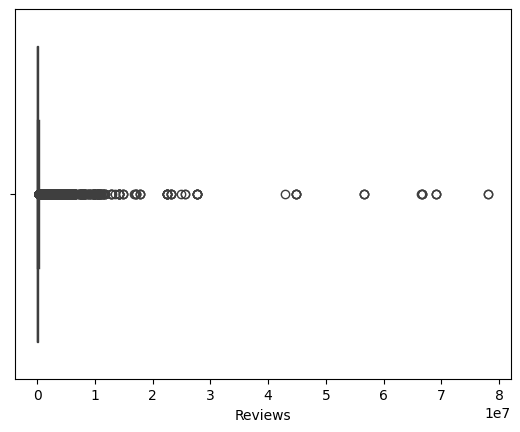

In [175]:
sns.boxplot(x = inp0['Reviews'])
plt.show()

**Distribution and Skewness**

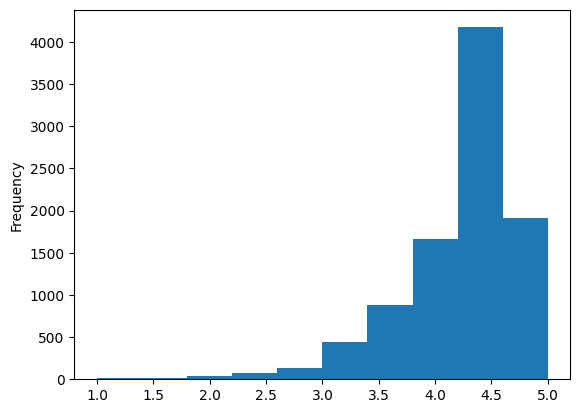

In [176]:
# distribution of ratings
inp0['Rating'].plot.hist()
plt.show()

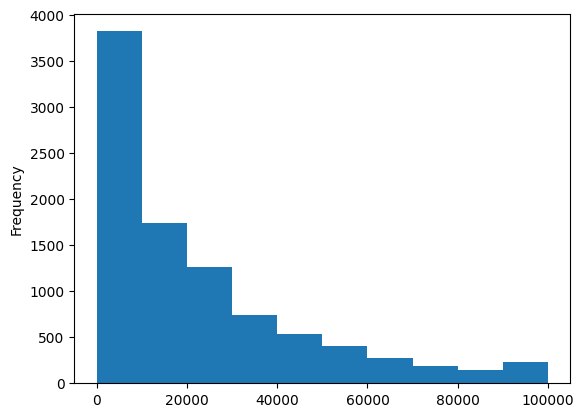

In [177]:
# histogram of size
inp0['Size'].plot.hist()
plt.show()

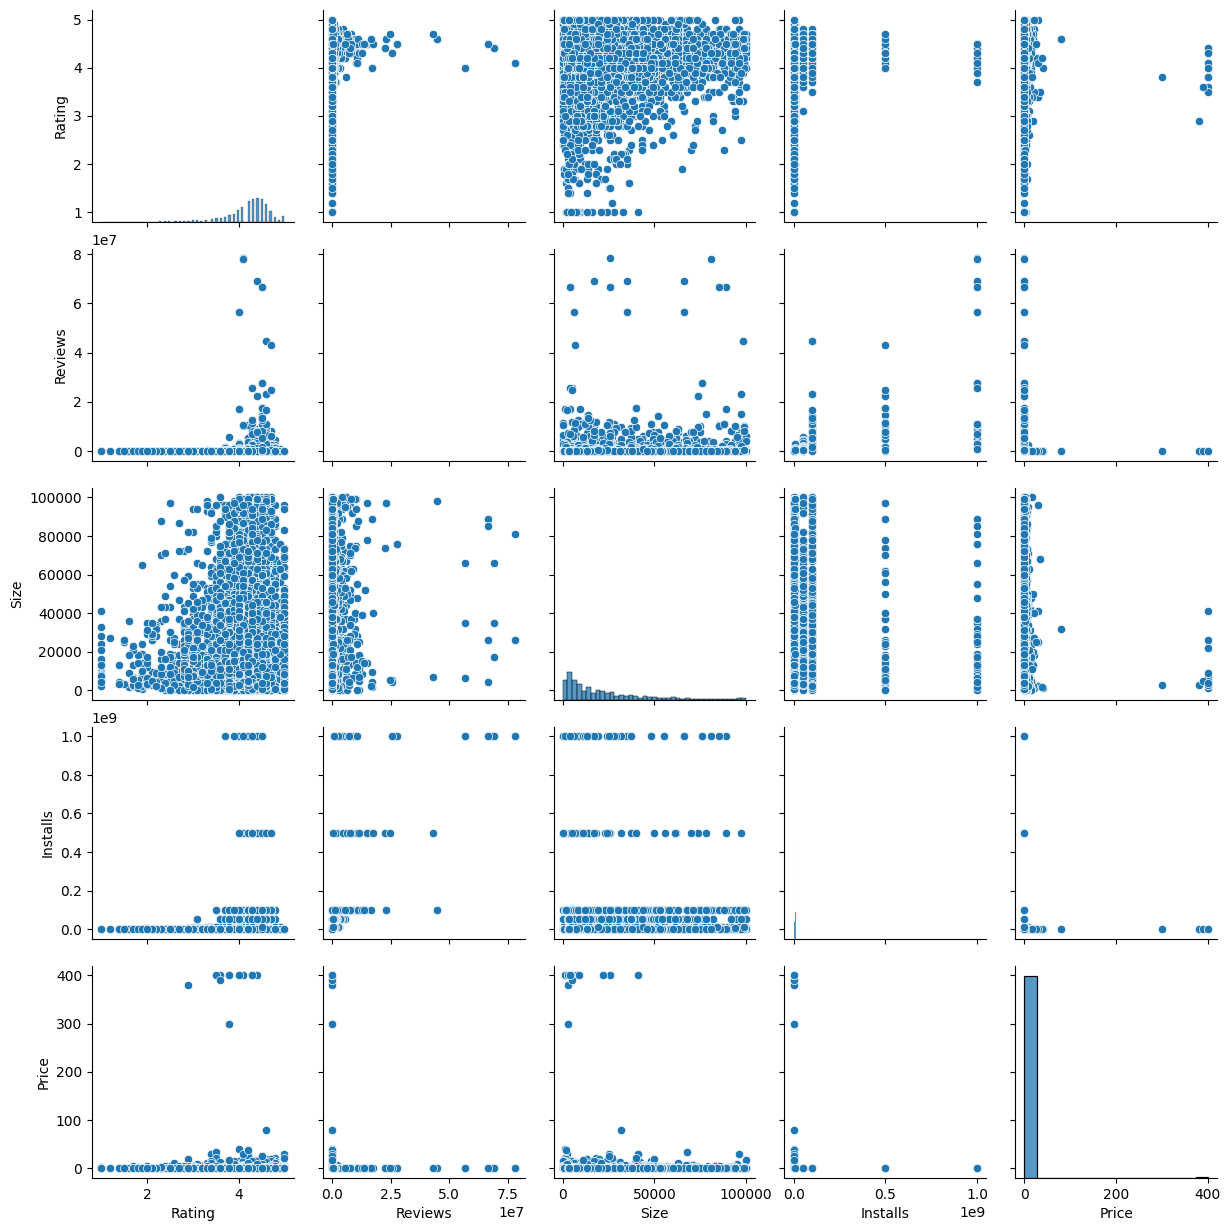

In [178]:
# pair plot
sns.pairplot(data=inp0)

**Outlier Treatement**

**1. Price**

In [179]:
inp0.shape

(9353, 13)

In [180]:
inp0[inp0['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [181]:
# removing rows with price more than 200
inp0 = inp0[inp0['Price'] <= 200]
inp0.shape

(9338, 13)

**2. Reviews**
<br>Very few apps have very high number of reviews. This will skew the analysis. So, we can drop records having more than 2 million reviews.

In [182]:
inp0 = inp0[inp0['Reviews'] <= 2000000]
inp0.shape

(8885, 13)

**3. Installs**

In [183]:
# dropping apps that have very high number of installs
inp0['Installs'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

99% of apps have installs below 100M. So, remove apps that have installs more than this

In [184]:
len(inp0[inp0['Installs'] > 100000000])

20

In [185]:
inp0 = inp0[inp0['Installs'] <= 100000000]
inp0.shape

(8865, 13)

**Bi-variate Analysis**

**1. Joint plot for rating vs price**

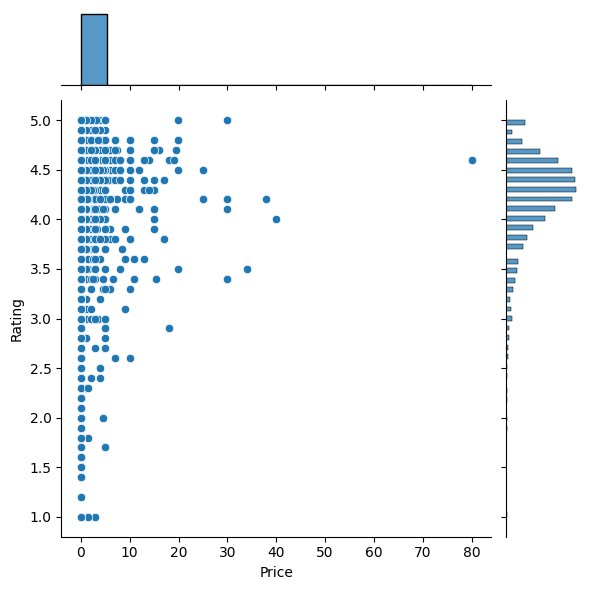

In [186]:
sns.jointplot(data=inp0, x='Price', y='Rating')
plt.show()

**2. Joint plot for rating vs size**

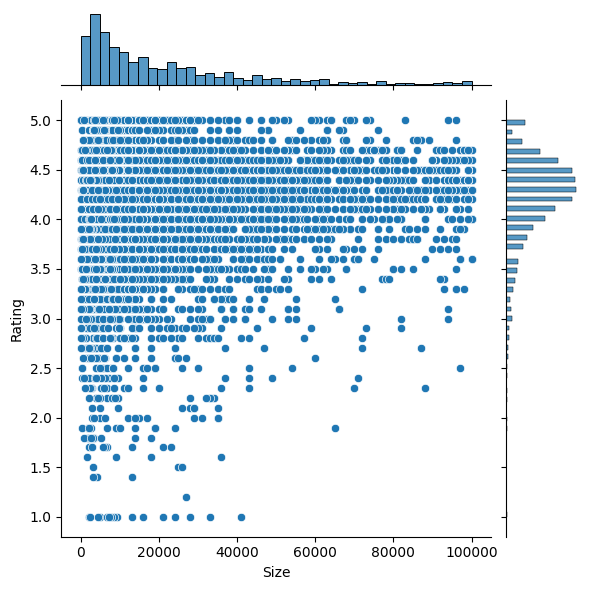

In [187]:
sns.jointplot(data=inp0, x='Size', y='Rating')
plt.show()

**3. Joint plot for rating vs reviews**

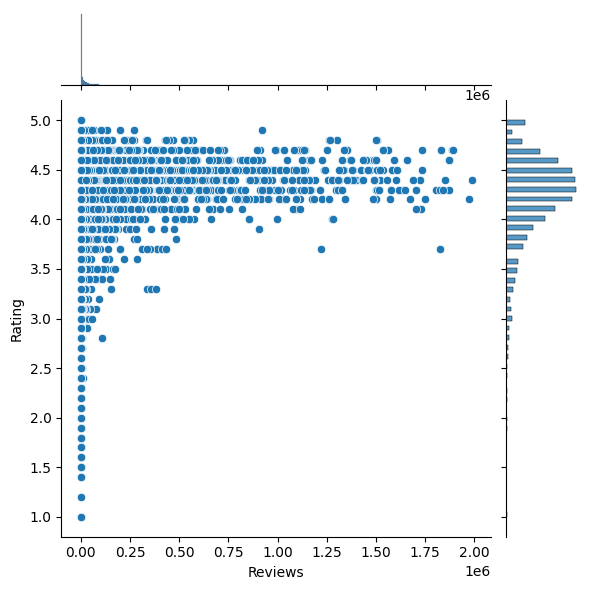

In [188]:
sns.jointplot(data=inp0, x='Reviews', y='Rating')
plt.show()

**4. Boxplot for Rating vs content rating**

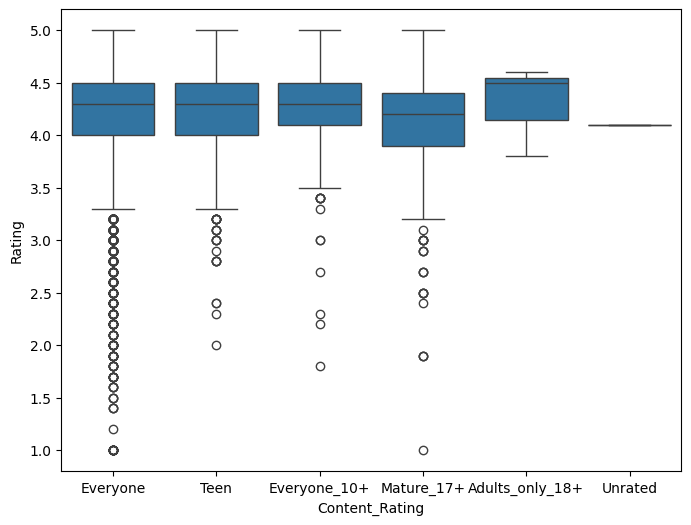

In [189]:
plt.figure(figsize=[8,6])
sns.boxplot(data=inp0, x='Content_Rating', y='Rating')
plt.show()

**5. Boxplot for rating vs category**

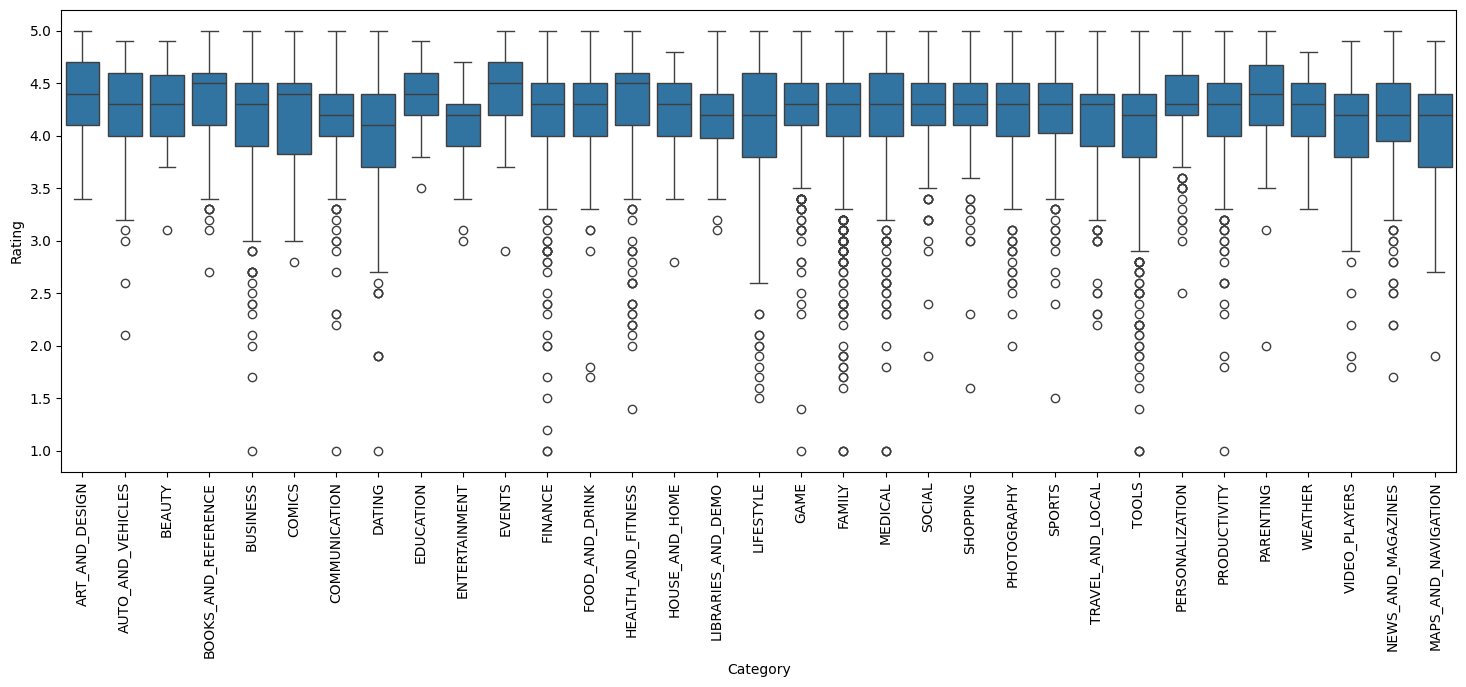

In [190]:
plt.figure(figsize=[18,6])
g = sns.boxplot(data=inp0, x='Category', y='Rating')
plt.xticks(rotation=90)
plt.show()

## **Pre-processing**

**1. Make a copy of a dataset**

In [191]:
inp1 = inp0.copy()

**2. Apply log transformation (np.log1p) to reviews and installs**

In [192]:
inp1['Installs'] = inp1['Installs'].apply(np.log1p)
inp1['Reviews'] = inp1['Reviews'].apply(np.log1p)

**3. Drop columns**
<br> App, Last Updated, Current Ver, and Android Ver are not useful for our task.

In [193]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [194]:
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape

(8865, 9)

**4. Dummy columns**

In [195]:
inp2 = pd.get_dummies(inp1, dtype=int, drop_first=True)

In [196]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [197]:
inp2.shape

(8865, 157)

## **Train-Test split**

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [200]:
df_train.shape, df_test.shape

((6205, 157), (2660, 157))

In [201]:
y_train = df_train.pop("Rating")
X_train = df_train

In [202]:
y_test = df_test.pop("Rating")
X_test = df_test

## **Statmodel for Linear Regression**

In [203]:
import statsmodels.api as sm

In [204]:
model1 = sm.OLS(y_train, X_train)

In [205]:
model1 = model1.fit()

In [206]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3758.
Date:                Fri, 24 May 2024   Prob (F-statistic):                        0.00
Time:                        10:00:48   Log-Likelihood:                         -4256.7
No. Observations:                6205   AIC:                                      8759.
Df Residuals:                    6082   BIC:                                      9588.
Df Model:                         123                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1737      0.006     27.572      0.000       0.161       0.186
Size                                         -7.342e-08   3.33e-07     -0.221      0.825   -7.25e-07    5.78e-07
Installs                                        -0.1482      0.006    -23.663      0.000      -0.160      -0.136
Price                                            0.0002      0.003      0.050      0.960      -0.006       0.006
Category_AUTO_AND_VEHICLES                       1.8274      0.132     13.864      0.000       1.569       2.086
Category_BEAUTY                                  1.9329      0.135     14.313      0.000       1.668       2.198
Category_BOOKS_AND_REFERENCE                     1.8830      0.129     14.568      0.000       1.630       2.136
Category_BUSINESS                                1.7940      0.128     13.965      0.000       1.542       2.046
Category_COMICS                                  2.6160      0.233     11.237      0.000       2.160       3.072
Category_COMMUNICATION                           1.7693      0.129     13.726      0.000       1.517       2.022
Category_DATING                                  1.7174      0.130     13.226      0.000       1.463       1.972
Category_EDUCATION                               3.3205      0.268     12.404      0.000       2.796       3.845
Category_ENTERTAINMENT                           3.2239      0.268     12.041      0.000       2.699       3.749
Category_EVENTS                                  1.9659      0.134     14.719      0.000       1.704       2.228
Category_FAMILY                                  3.3496      0.261     12.857      0.000       2.839       3.860
Category_FINANCE                                 1.7853      0.129     13.892      0.000       1.533       2.037
Category_FOOD_AND_DRINK                          1.7846      0.130     13.684      0.000       1.529       2.040
Category_GAME                                    3.5604      0.256     13.883      0.000       3.058       4.063
Category_HEALTH_AND_FITNESS                      1.8187      0.129     14.136      0.000       1.567       2.071
Category_HOUSE_AND_HOME                          1.8261      0.132     13.872      0.000       1.568       2.084
Category_LIBRARIES_AND_DEMO                      1.8469      0.133     13.933      0.000       1.587       2.107
Category_LIFESTYLE                               1.7802      0.128     13.859      0.000       1.528       2.032
Category_MAPS_AND_NAVIGATION                     1.7464      0.130     13.404      0.000       1.491       2.002
Category_MEDICAL                              

**Prediction and evaluation of model**

In [207]:
import sklearn.metrics as metrics
y_test_pred = model1.predict(X_test)

**RMSE**

In [208]:
# Lower values of RMSE indicate better fit
print(f"RMSE of Model1: {np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}")

RMSE of Model1: 0.4976651518469778


**MPE**

In [209]:
def MPE(y_test_pred, y_test):
  return(((y_test - y_test_pred) / y_test).mean()) * 100

print(f"MPE of Model1: {MPE(y_test_pred, y_test)}")

MPE of Model1: -2.303923053842291


**MAPE**

In [210]:
def MAPE(y_test_pred, y_test):
  return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"MAPE of Model1: {MAPE(y_test_pred, y_test)}")

MAPE of Model1: 9.633139765371368


# **Ridge Regression**

In [211]:
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001)
ridgeReg.fit(X_train, y_train)

Ridge(alpha=0.001)

**RMSE**

In [213]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, ridgeReg.predict(X_train))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, ridgeReg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))

0.47790275147581956
0.4905895530226606
R2 Value/Coefficient of Determination: 0.13973068287862844


# **Lasso Regression**

In [214]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001)

**RMSE**

In [216]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, lassoreg.predict(X_train))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, lassoreg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))

0.4829175582760151
0.4920785674939312
R2 Value/Coefficient of Determination: 0.13450065953424561


# **ElasticNet Regression**

In [218]:
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001)
Elastic.fit(X_train, y_train)

ElasticNet(alpha=0.001)

**RMSE**

In [220]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, Elastic.predict(X_train))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, Elastic.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test, y_test)))

0.4809427934335688
0.4908292903581564
R2 Value/Coefficient of Determination: 0.13888969853989508


# **Gradient Descent**